# Importing Libraries

In [22]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.image as img
import gradio as gr
from PIL import Image
from tensorflow.keras.models import load_model

# Data Loading and Preprocessing

In [2]:
import splitfolders as sf

# Define input and output paths
input_folder = "D:/Alzheimer Disease Prediction/Dataset"
output_folder = "D:/working/output"

# Split the dataset into 80% train, 10% val, 10% test
sf.ratio(input_folder, output=output_folder, seed=1345, ratio=(0.8, 0.1, 0.1))

print("Dataset successfully split!")

Copying files: 6400 files [00:06, 985.80 files/s] 

Dataset successfully split!


In [3]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"D:/working/output/train",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"D:/working/output/test",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"D:/working/output/val",
seed=123,
image_size=(IMG_HEIGHT, IMG_WIDTH),
batch_size=64
)

Found 5119 files belonging to 4 classes.
Found 642 files belonging to 4 classes.
Found 639 files belonging to 4 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)
train_ds

['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']


<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

# Sample Image

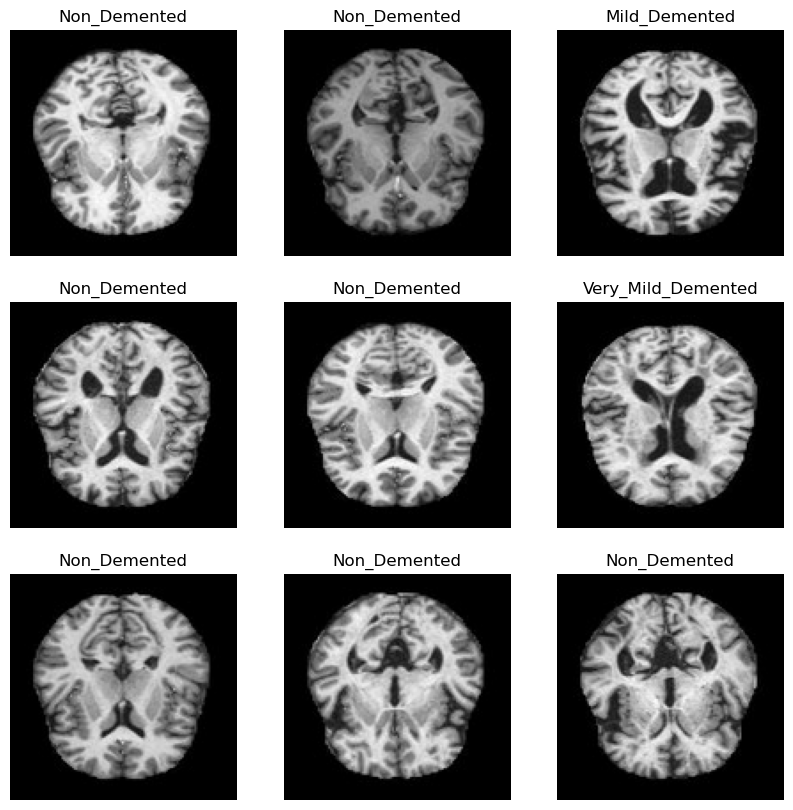

In [6]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

# Custom CNN Sequential Model using Keras and Tensorflow

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(IMG_HEIGHT, IMG_WIDTH, 3)))
model.add(keras.layers.Rescaling(1./255))
model.add(keras.layers.Conv2D(filters=16, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation="relu", kernel_initializer="he_normal"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(4, activation="softmax"))

In [8]:
model.compile(loss="sparse_categorical_crossentropy", optimizer = "Adam",metrics=["accuracy"])

In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 128, 128, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     2,097,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,129,380 (8.12 MB)

 Trainable params: 2,129,380 (8.12 MB)

 Non-trainable params: 0 (0.00 B)

In [10]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=50, batch_size=64, verbose=1)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 16s 163ms/step - accuracy: 0.4385 - loss: 2.7715 - val_accuracy: 0.5008 - val_loss: 1.0433
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.5090 - loss: 0.9893 - val_accuracy: 0.5509 - val_loss: 0.9402
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 101ms/step - accuracy: 0.5588 - loss: 0.9206 - val_accuracy: 0.5931 - val_loss: 0.8878
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 103ms/step - accuracy: 0.6093 - loss: 0.8550 - val_accuracy: 0.6604 - val_loss: 0.7882
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.6524 - loss: 0.7901 - val_accuracy: 0.6714 - val_loss: 0.7928
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 100ms/step - accuracy: 0.6849 - loss: 0.7187 - val_accuracy: 0.7684 - val_loss: 0.5933
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.7248 - loss: 0.6320 - val_accuracy: 0.7997 - val_loss: 0.5065
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.7733 - loss: 0.5344 - val_accuracy: 0.

In [12]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

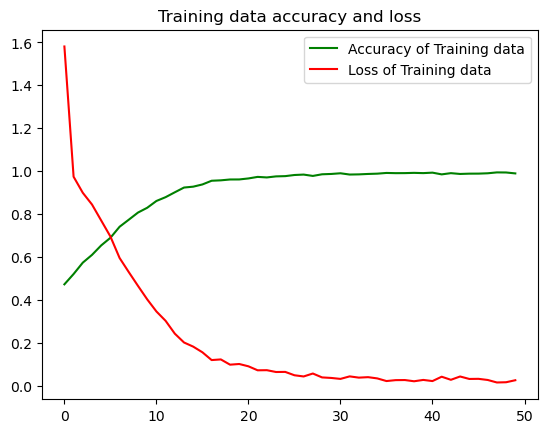

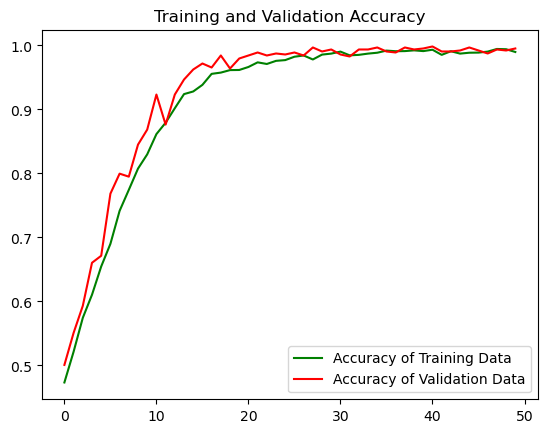

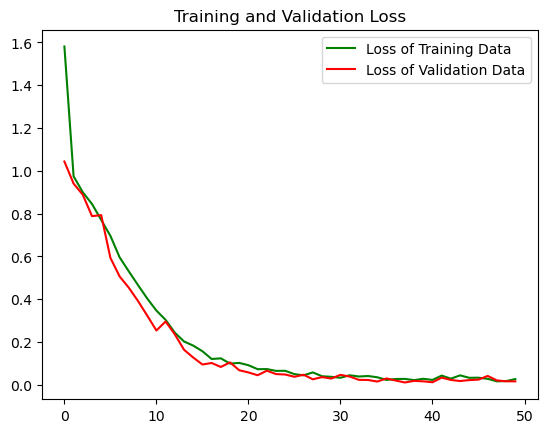

<Figure size 640x480 with 0 Axes>

In [13]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

# Predictions

In [14]:
loss, accuracy = model.evaluate(test_ds)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9965 - loss: 0.0236


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


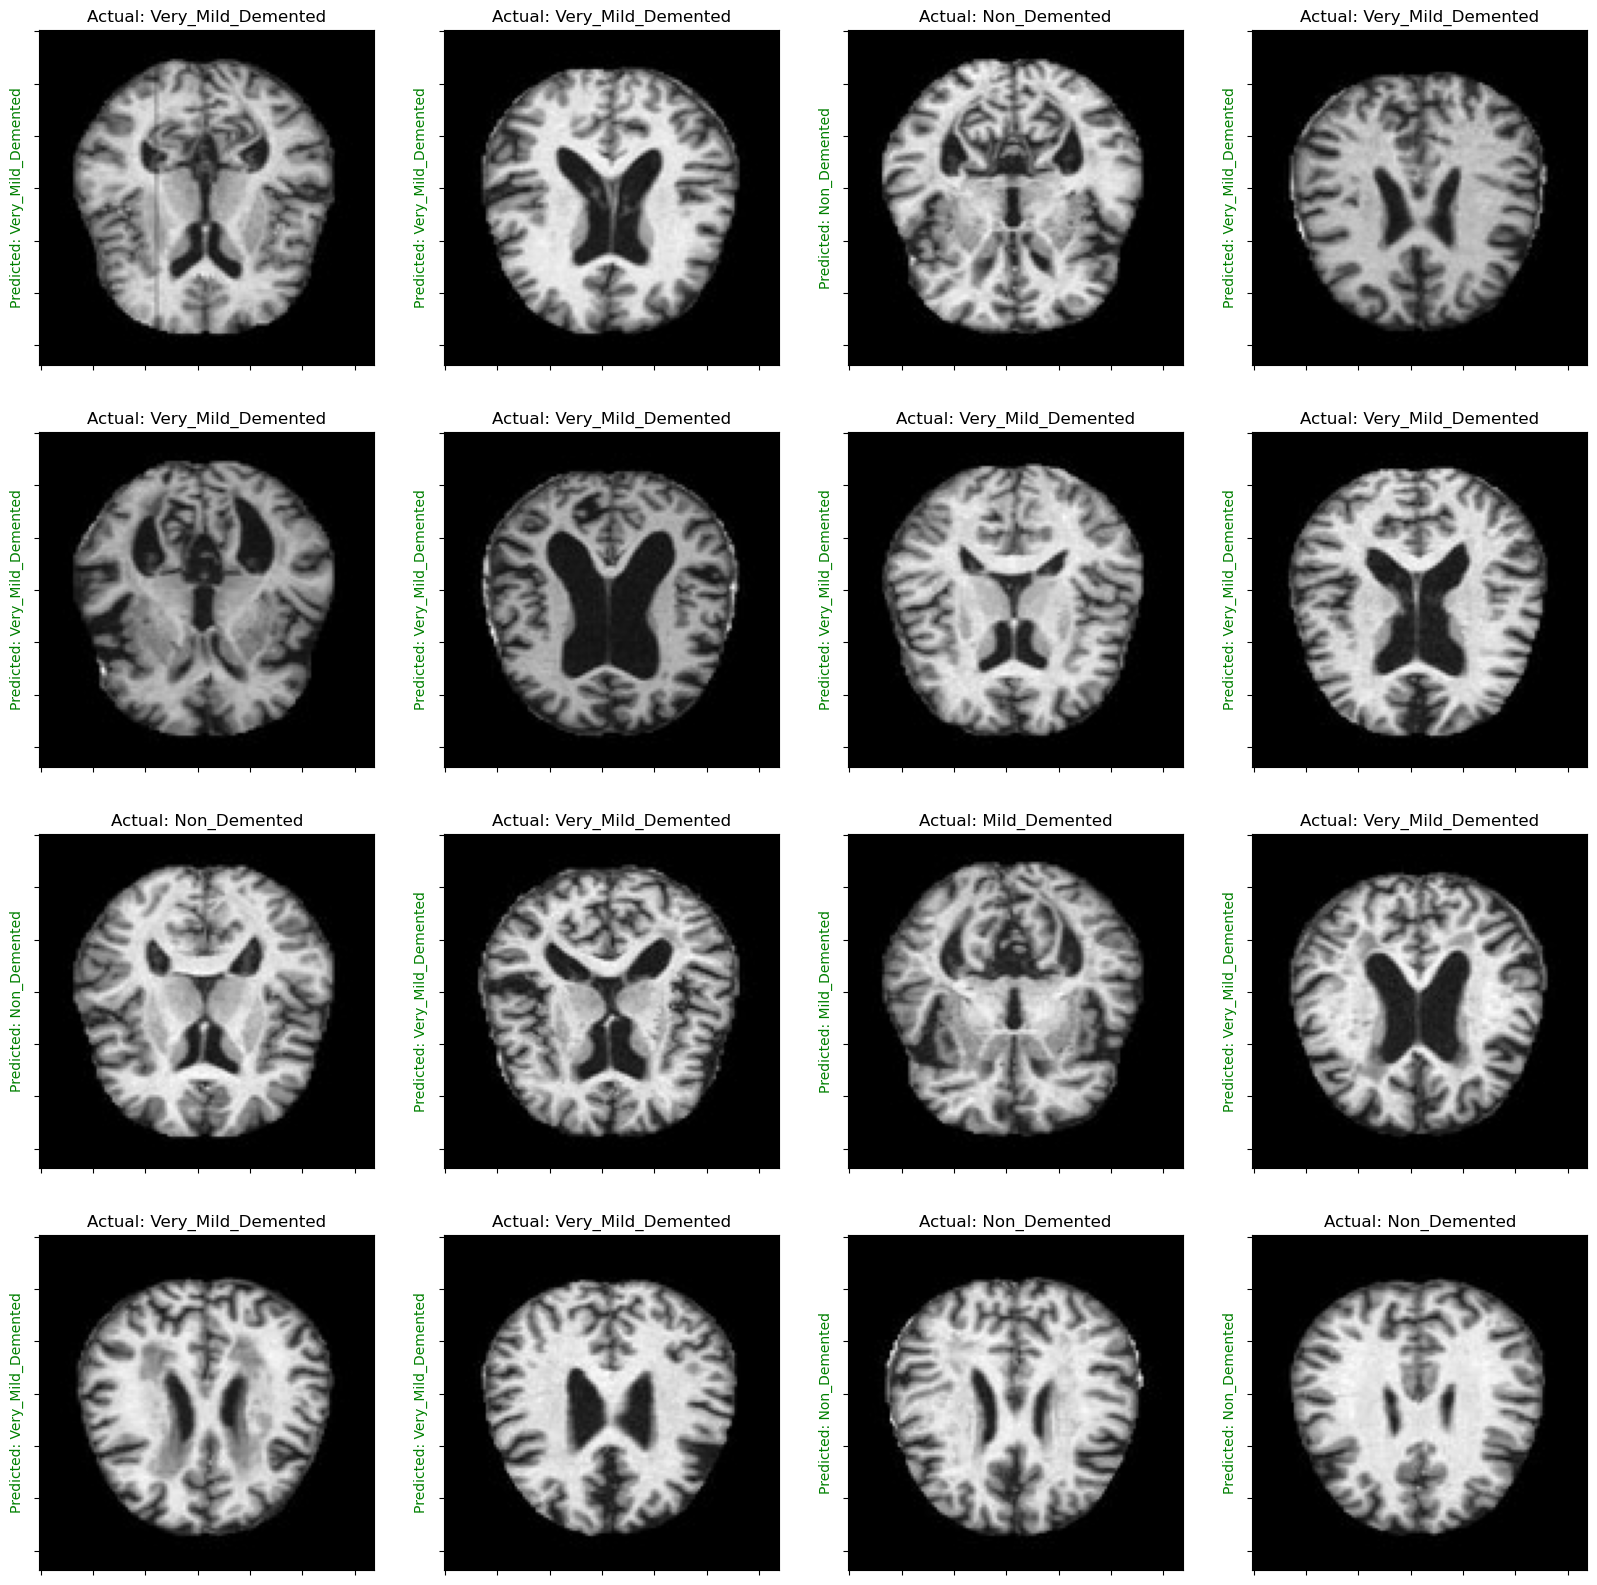

In [15]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]])
            plt.ylabel("Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])

# Gradio Inteface 

In [40]:
model.save("alzheimer_model.h5")
print("Model saved as alzheimer_model.h5")

Model saved as alzheimer_model.h5


In [44]:
IMG_HEIGHT = 128
IMG_WIDTH = 128
class_names = ['Mild_Demented', 'Moderate_Demented', 'Non_Demented', 'Very_Mild_Demented']

In [46]:
model = load_model("alzheimer_model.h5")

In [53]:
def preprocess(image):
    image = image.resize((IMG_WIDTH, IMG_HEIGHT))
    image = np.array(image).astype("float32")  
    return image
    

In [55]:
def predict(image):
    img = preprocess(image)
    img_tensor = tf.expand_dims(img, 0)  

    predictions = model.predict(img_tensor)
    score = tf.nn.softmax(predictions[0])
    predicted_label = class_names[np.argmax(score)]
    confidence = float(np.max(score))

    return f"Prediction: {predicted_label} ({confidence * 100:.2f}% confidence)"

In [57]:
interface = gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs="text",
    title="Alzheimer's Disease Prediction using CNN",
    description="Upload a brain MRI image to predict Alzheimer's stage.",
    theme="default"
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7871
* Running on public URL: https://1455ca42815a587924.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
